In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()

Saving processed_train.csv to processed_train.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['processed_train.csv']))
data.head()

,content,sentiment
0,fur heck move fridge knock landlord door angry...,anger
1,pouk ask parcel deliver pick store address fum...,anger
2,ef whichever butt wipe pull fire alarm davis b...,anger
3,do not join bucare put phone talk rude take mo...,anger
4,blood boiling,anger


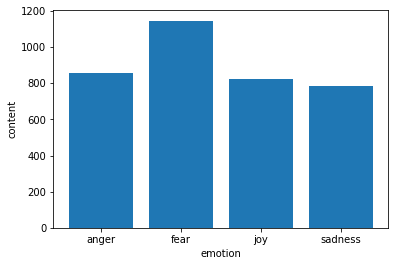

In [7]:
data.sentiment.value_counts()
countEmotion=data.groupby('sentiment').count()
plt.bar(countEmotion.index.values, countEmotion['content'])
plt.xlabel('emotion')
plt.ylabel('content')
plt.show()


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [12]:
train , test = train_test_split(data,test_size=0.20)
train.head()

,content,sentiment
2745,want slide des i be fucking shy,fear
1138,rubai92 try ask cheeseburger onion amp mustard...,joy
1156,cheerfulness good temper spend remain,joy
1728,health insurance will not cover tm let know co...,sadness
2386,one want win wild card play cubs road,sadness


In [13]:
text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])

In [14]:
text_clf.fit(train['content'],train['sentiment'])

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [15]:
predicted = text_clf.predict(test['content'])

In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [23]:
print('Accuracy achieved is ' + str(np.mean(predicted == test['sentiment'])))


Accuracy achieved is 0.7634854771784232


In [25]:
print(metrics.classification_report(test['sentiment'], predicted)),


              precision    recall  f1-score   support

       anger       0.92      0.74      0.82       175
        fear       0.61      0.97      0.75       230
         joy       0.95      0.71      0.81       163
     sadness       0.90      0.55      0.68       155

    accuracy                           0.76       723
   macro avg       0.85      0.74      0.76       723
weighted avg       0.82      0.76      0.76       723



(None,)

In [26]:
cm = metrics.confusion_matrix(test['sentiment'], predicted)
print(cm)

[[129  38   2   6]
 [  3 223   2   2]
 [  1  46 115   1]
 [  7  61   2  85]]


In [20]:
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


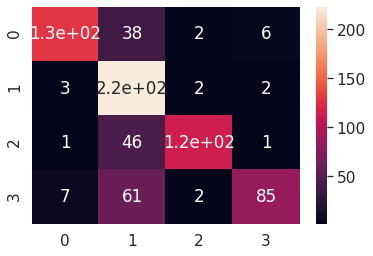

In [22]:
df_cm = pd.DataFrame(cm, range(4), range(4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

plt.show()